In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
from adjustText import adjust_text
%matplotlib inline

In [2]:
df = pd.read_csv('../data/EPL 19-20 outfield_colR.csv')
df1 = pd.read_csv('../data/EFL 19-20 outfield_colR.csv')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.concat([df, df1], axis=0)

In [4]:
df

,player_id,position,player,age,team_id,team,foot,mins_played,nineties,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,interception,total_clearance,effective_clearance,total_long_balls,accurate_long_balls,passes_right,passes_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_fastbreak,att_rf_total,att_lf_total,att_hd_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,head_pass,challenge_lost,aerial_won,aerial_lost,pen_goals_conceded,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,total_pull_back,accurate_pull_back,goal_assist_openplay,att_assist_openplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,second_goal_assist,hit_woodwork,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,total_fastbreak,att_one_on_one,fouled_final_third,goals_openplay,att_openplay,assist_pass_lost,assist_blocked_shot,assist_attempt_saved,assist_post,assist_free_kick_won,assist_handball_won,assist_own_goal,assist_penalty_won,open_play_pass,successful_open_play_pass,attempted_tackle_foul,put_through,successful_put_through,blocked_pass,touches_in_opp_box,attempts_ibox,attempts_obox,expected_goals_nonpenalty,expected_goals_openplay,expected_goals_hd,expected_goals_lf,expected_goals_rf,expected_goals_conceded,expected_goals_nonpenalty_conceded,expected_goalsontarget,expected_goalsontarget_nonpenalty,expected_goalsontarget_nonpenalty_conceded,expected_assists,expected_assists_openplay
0,95658,Defender,Harry Maguire,27.2,1,Manchester United,Right,2610,29.000000,0.896552,0.275862,0.206897,0.034483,0.000000,0.000000,62.896552,53.551724,0.068966,0.000000,24.137931,18.448276,0.034483,0.034483,0.034483,0.344828,0.482759,1.103448,0.689655,0.310345,0.689655,0.206897,0.827586,0.0

In [5]:
# Filter for Midfielders
mask = (df.position == 'Midfielder')
df = df.loc[mask]

In [6]:
players = df['player'].tolist()

In [7]:
# Drop columns
df1 = df.drop(['position', 'player', 'team', 'foot', 'mins_played', 'nineties'], axis=1)

In [8]:
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()  # could also test using the StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [9]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [10]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( transformed )
  cluster_errors.append( clusters.inertia_ )

In [11]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [12]:
clusters_df

,num_clusters,cluster_errors
0,1,390.480297
1,2,196.521944
2,3,147.006745
3,4,114.651401
4,5,92.212286
5,6,75.485557
6,7,64.114332
7,8,56.248042
8,9,50.440284
9,10,44.749773


In [13]:
# sns.set(style="white")
# plt.figure(figsize=(12,6))
# plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
# plt.tick_params(labelsize=15)

# plt.xlabel("Clusters", fontsize=20)
# plt.ylabel("Sum of squared errors", fontsize=20)

In [14]:
# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(transformed)
# Getting the cluster labels
labels = kmeans.predict(transformed)
# Centroid values
C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [15]:
transformed['cluster'] = clusters

In [16]:
players

['Daniel James',
 'Fred',
 'Scott McTominay',
 'Andreas Pereira',
 'Nemanja Matic',
 'Jesse Lingard',
 'Juan Mata',
 'Paul Pogba',
 'Granit Xhaka',
 'Matteo Guendouzi',
 'Mesut Özil',
 'Lucas Torreira',
 'Ainsley Maitland-Niles',
 'Dani Ceballos',
 'Joseph Willock',
 'Miguel Almirón',
 'Isaac Hayden',
 'Jonjo Shelvey',
 'Sean Longstaff',
 'Christian Atsu',
 'Matt Ritchie',
 'Matthew Longstaff',
 'Dele Alli',
 'Giovani Lo Celso',
 'Moussa Sissoko',
 'Lucas Moura',
 'Harry Winks',
 'Christian Eriksen',
 'Tanguy Ndombele',
 'Erik Lamela',
 'Eric Dier',
 'Jack Grealish',
 'Douglas Luiz',
 'Anwar El Ghazi',
 'Marvelous Nakamba',
 'John McGinn',
 'Trézéguet',
 'Conor Hourihane',
 'Mason Mount',
 'Jorginho',
 'Mateo Kovacic',
 "N'Golo Kanté",
 'Christian Pulisic',
 'Ross Barkley',
 'Gylfi Sigurdsson',
 'Tom Davies',
 'Fabian Delph',
 'Morgan Schneiderlin',
 'André Gomes',
 'James Maddison',
 'Youri Tielemans',
 'Wilfred Ndidi',
 'Harvey Barnes',
 'Dennis Praet',
 'Hamza Choudhury',
 'Georgini

In [17]:
transformed['player'] = players

In [18]:
transformed.columns = ['x','y','cluster','name']

In [19]:
transformed

,x,y,cluster,name
0,1.193819,-0.549086,3,Daniel James
1,-0.758989,1.149913,2,Fred
2,-0.319165,0.013644,0,Scott McTominay
3,1.195994,0.520322,1,Andreas Pereira
4,-1.461997,0.567994,2,Nemanja Matic
...,...,...,...,...
167,1.859476,0.925213,1,Matheus Pereira
168,2.211223,0.148394,3,Matt Phillips
169,0.671708,0.661194,1,Filip Krovinovic
170,1.038792,-1.521376,3,Jonathan Leko


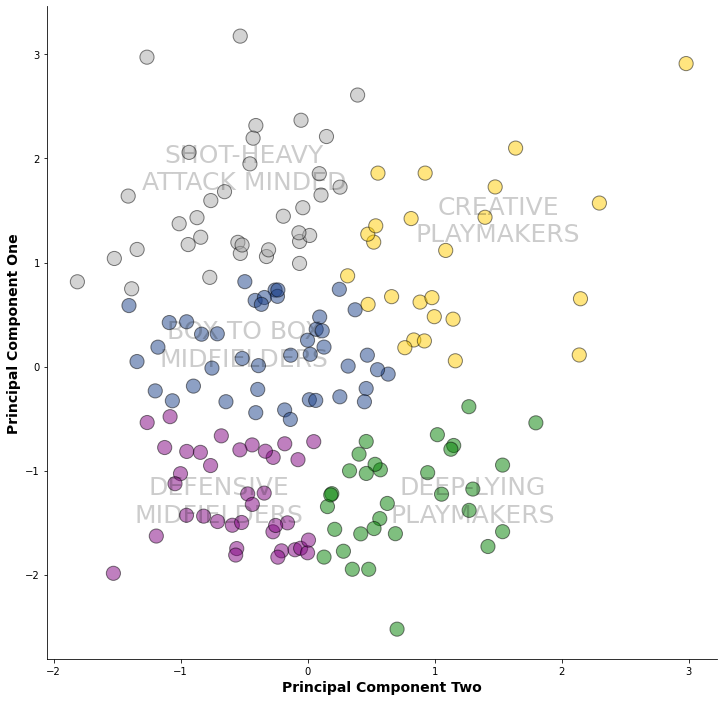

In [25]:
fig, ax = plt.subplots(figsize=(12,12))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

clr = {0:'#1D428A', 1:'#FFCD00', 2:'green', 3:'darkgrey', 4:'purple'}

# ax.scatter(def_o['y'], def_o['x'], s=200, facecolors='#E3E3E3', edgecolors='grey', zorder=2, alpha=0.8)
ax.scatter(transformed['y'], transformed['x'], s=200, c=transformed['cluster'].apply(lambda x: clr[x]), zorder=2,
           edgecolors='black', linewidths=1,alpha=0.5)

# dx, dy = transformed.y.values, transformed.x.values
# for i in range(len(transformed)):
#     if transformed.name.iloc[i] == "Emiliano Buendía":
#         ax.text(dx[i],dy[i]+0.09,transformed.name.iloc[i],ha="center",color="black",zorder=6,fontweight="bold",fontsize=12)
#     elif transformed.name.iloc[i] == "Pascal Groß":
#         ax.text(dx[i],dy[i]+0.09,transformed.name.iloc[i],ha="center",color="black",zorder=6,fontweight="bold",fontsize=12)
#     elif transformed.name.iloc[i] == "Kevin De Bruyne":
#         ax.text(dx[i],dy[i]+0.09,transformed.name.iloc[i],ha="center",color="black",zorder=6,fontweight="bold",fontsize=12)


ax.text(1.3,-1.5, 'DEEP-LYING\nPLAYMAKERS', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')
ax.text(-0.7,-1.5, 'DEFENSIVE\nMIDFIELDERS', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')
ax.text(-0.5,0, 'BOX TO BOX\nMIDFIELDERS', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')
ax.text(-0.5,1.7, 'SHOT-HEAVY\nATTACK MINDED', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')
ax.text(1.5,1.2, 'CREATIVE\nPLAYMAKERS', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')

# Label axis
ax.set_ylabel("Principal Component One",fontsize=14,fontweight="bold",color="black")
ax.set_xlabel("Principal Component Two",fontsize=14,fontweight="bold",color="black");

plt.savefig("PCA_mid", dip=500, bbox_inches='tight',transparent=True)

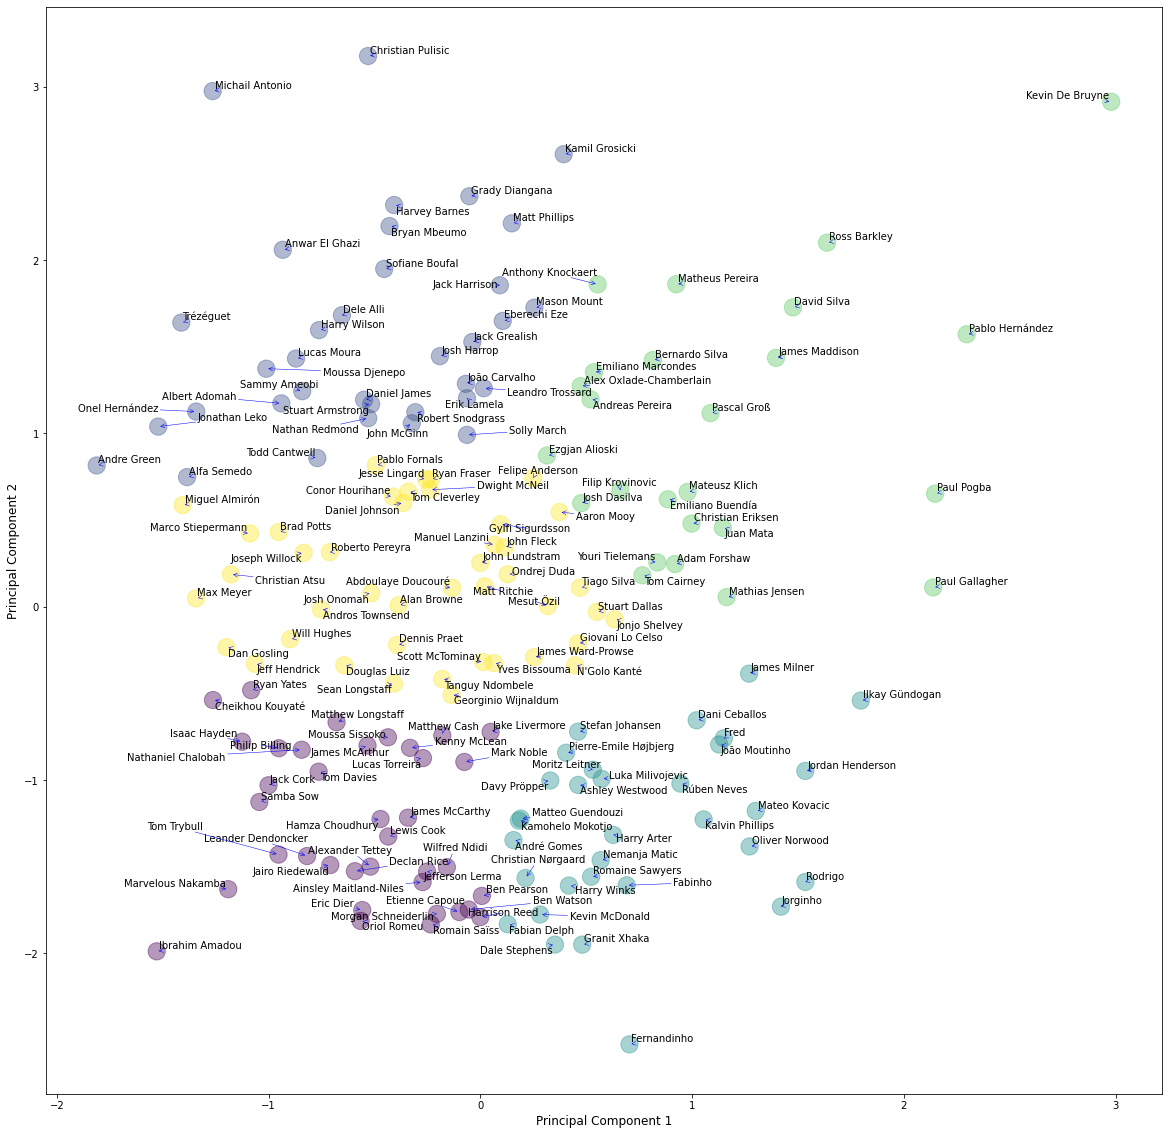

In [30]:
fig, ax = plt.subplots(figsize=(20,20))

v = transformed['cluster']

ax.scatter(transformed['y'], transformed['x'], s=300, c=v, zorder=2, alpha=0.4)

texts = []
for y, x, s in zip(transformed.y, transformed.x, transformed.name):
    texts.append(plt.text(y, x, s))
adjust_text((texts) , arrowprops=dict(arrowstyle="->", color='b', lw=0.5));

# Label axis
ax.set_ylabel("Principal Component 2",fontsize=12)
ax.set_xlabel("Principal Component 1",fontsize=12);

# ax.savefig("def_kmeans.jpg");

In [ ]:
mask = (transformed['cluster'] == 1) | (transformed['cluster'] == 3)
cm = transformed.loc[mask]

In [ ]:
cm

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


col = {3:'#1D428A', 1:'#FFCD00'}

# v = cb['cluster']

ax.scatter(cm['y'], cm['x'], s=200, c=cm['cluster'].apply(lambda x: col[x]), zorder=2, alpha=0.5)

ax.text(0.2, 0.85, 'HIGH SHOT\nVOLUME', verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes, color='black', fontsize=30, alpha=0.1)
ax.text(0.8, 0.3, 'INVOLVEMENT\nTHROUGH-BALLS', verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes, color='black', fontsize=30, alpha=0.1)

texts = []
for y, x, s in zip(cm.y, cm.x, cm.name):
    texts.append(plt.text(y, x, s))
adjust_text((texts) , arrowprops=dict(arrowstyle="->", color='grey', lw=0.5));

# Label axis
ax.set_ylabel("Principal Component One",fontsize=14,fontweight="bold",color="black")
ax.set_xlabel("Principal Component Two",fontsize=14,fontweight="bold",color="black");

# ax.savefig("newc_man_kmeans.jpg");